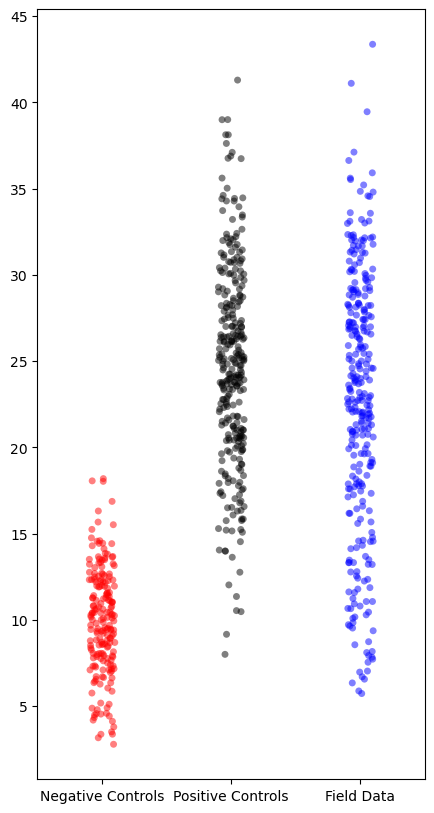

In [1]:
# problem 3a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import
negative=pd.read_csv('HW4_Q3_neg.csv')
positive=pd.read_csv('HW4_Q3_pos.csv')
data=pd.read_csv('HW4_Q3_data.csv')

combined=pd.DataFrame({'Negative Controls':negative.iloc[:,0],'Positive Controls':positive.iloc[:,0],'Field Data':data.iloc[:,0]})

#plot
plt.figure(figsize=(5, 10))
sns.stripplot(data=combined,palette=['red','black','blue'],jitter=True,alpha=0.5)
plt.show()


In [10]:
def se(c):
    return sum(positive.iloc[:, 0] > c)/len(positive)

def sp(c):
    return sum(negative.iloc[:, 0] < c)/len(negative)

def phi(c):
    return sum(data.iloc[:, 0] > c)/len(data)

def theta(c):
    return (phi(c)-(1-sp(c)))/(se(c)+sp(c)-1)


In [3]:
c=14.96

print('Specificity =', se(c))
print('Sensitivity =', sp(c))
print('Raw Prevalence =', phi(c))
print('Corrected Prevalence=', theta(c))

Specificity = 0.959866220735786
Sensitivity = 0.9597989949748744
Raw Prevalence = 0.8093645484949833
Corrected Prevalence= 0.836351674859743


In [4]:
from scipy.optimize import minimize_scalar

def J(c):
    return (se(c)+sp(c)-1)

result = minimize_scalar(lambda c: -J(c),bounds=(5,40),method='bounded')

print(result)


     fun: -0.9196652157106604
 message: 'Solution found.'
    nfev: 27
     nit: 27
  status: 0
 success: True
       x: 14.958100328238386


Text(0, 0.5, 'Theta')

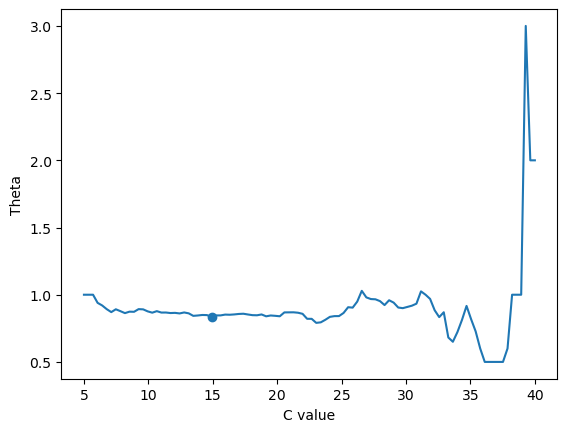

In [17]:
c_values = np.linspace(5, 40, 100)
thetas=[theta(c) for c in c_values]
plt.plot(c_values, thetas)
plt.scatter(14.96, theta(14.96)) 
plt.xlabel('C value')
plt.ylabel('Theta')

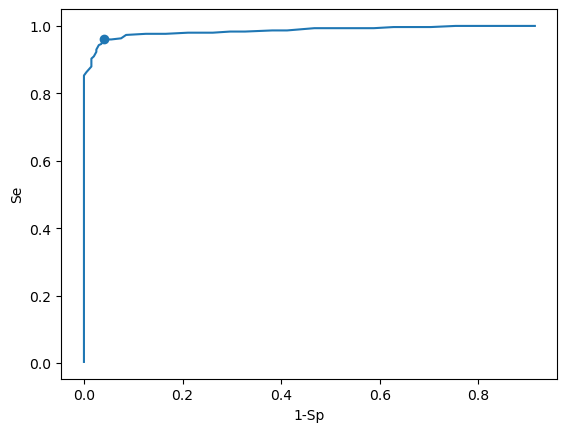

In [16]:
c_values = np.linspace(5, 40, 100)
sens = [se(c) for c in c_values]
spec = [sp(c) for c in c_values]
invsp = [1 - sp for sp in specificities]
plt.plot(invsp,sens)
plt.xlabel('1-Sp')
plt.ylabel('Se')

plt.scatter((1-sp(14.96)), se(14.96)) 

plt.show()
